# Importation des données

In [35]:
import pickle

with open('.\\data\\prepared_data\\useful\\X_useful_train.pkl', 'rb') as f:
    X_useful_train = pickle.load(f)
    
with open('.\\data\\prepared_data\\useful\\Y_useful_train.pkl', 'rb') as f:
    y_useful_train = pickle.load(f)

with open('.\\data\\prepared_data\\useful\\X_useful_test.pkl', 'rb') as f:
    X_useful_test = pickle.load(f)
    
with open('.\\data\\prepared_data\\useful\\Y_useful_test.pkl', 'rb') as f:
    y_useful_test = pickle.load(f)

# Entrainement des modèles

In [36]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Instantiate label encoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test
y_train_useful_encoded = label_encoder.fit_transform(y_useful_train)
y_test_useful_encoded = label_encoder.fit_transform(y_useful_test)


## SGD Classifier

In [37]:
from sklearn.linear_model import SGDClassifier

# Instantiate classifier
sgd_clf = SGDClassifier(random_state=42)

# Fit classifier
sgd_clf.fit(X_useful_train, y_train_useful_encoded)

SGDClassifier(random_state=42)

In [38]:
from sklearn.model_selection import cross_val_score

# Cross-validate classifier
cross_val_score(sgd_clf, X_useful_train, y_train_useful_encoded, cv=3, scoring="accuracy")

array([0.86139456, 0.84438776, 0.83078231])

In [39]:
from sklearn.model_selection import cross_val_predict

# Cross-validate classifier
y_train_pred = cross_val_predict(sgd_clf, X_useful_train, y_train_useful_encoded, cv=3)

In [40]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision_score(y_train_useful_encoded, y_train_pred)

0.5277777777777778

In [41]:
# Calculate recall
recall_score(y_train_useful_encoded, y_train_pred)

0.4007029876977153

In [42]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1_score(y_train_useful_encoded, y_train_pred)

0.45554445554445555

In [43]:
from sklearn.metrics import precision_recall_curve

# Show the precision/recall curve
y_scores = cross_val_predict(sgd_clf, X_useful_train, y_train_useful_encoded, 
                             cv=3, method="decision_function")

precision, recall, thresholds = precision_recall_curve(y_train_useful_encoded, y_scores)

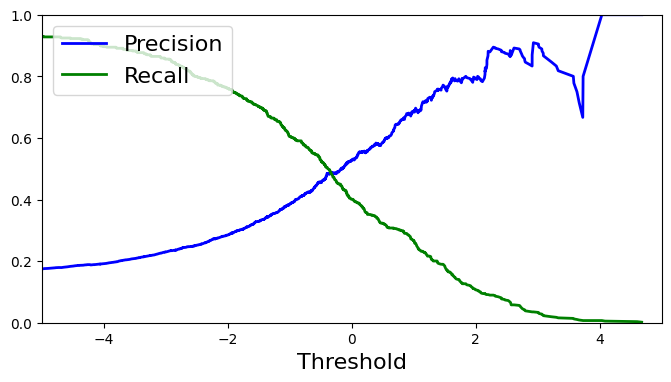

In [44]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlim([-5, 5])
plt.show()

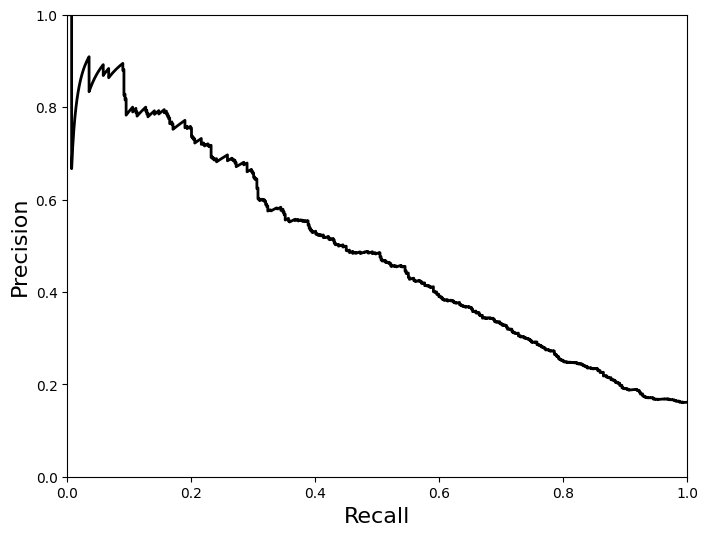

In [45]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

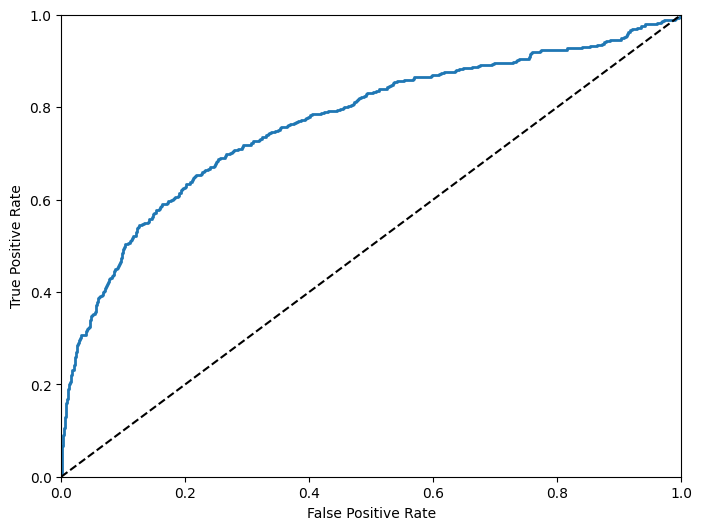

In [46]:
from sklearn.metrics import roc_curve

# Show the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_useful_encoded, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
roc_auc_score(y_train_useful_encoded, y_scores)

0.7677931139753551

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate classifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

# Fit classifier
forest_clf.fit(X_useful_train, y_train_useful_encoded)

y_probas_forest = cross_val_predict(forest_clf, X_useful_train, y_train_useful_encoded, cv=3, 
                                    method="predict_proba")

In [49]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_useful_encoded, y_scores_forest)

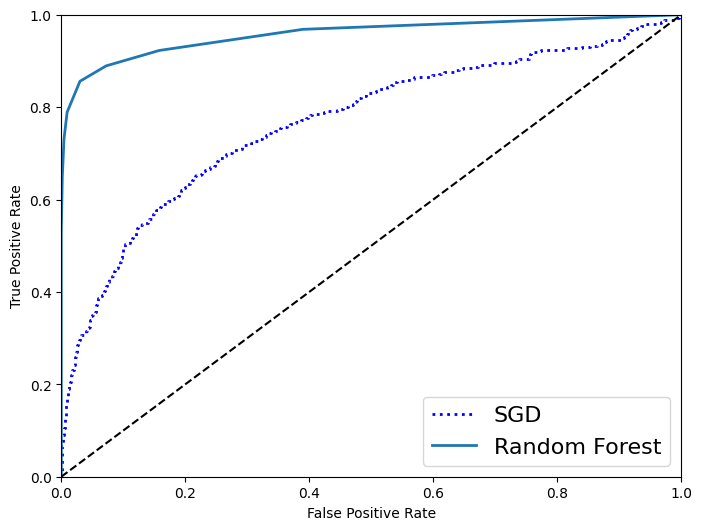

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [51]:
# Calculate AUC
roc_auc_score(y_train_useful_encoded, y_scores_forest)

0.9578750836713349

In [52]:
# Calculate precision
precision_score(y_train_useful_encoded, y_train_pred)

0.5277777777777778

In [53]:
# Calculate recall
recall_score(y_train_useful_encoded, y_train_pred)

0.4007029876977153

In [54]:
# Calculate F1 score
f1_score(y_train_useful_encoded, y_train_pred)

0.45554445554445555

In [55]:
# Show the precision/recall curve
y_scores_forest = forest_clf.predict_proba(X_useful_test)[:, 1]

precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_test_useful_encoded, y_scores_forest)

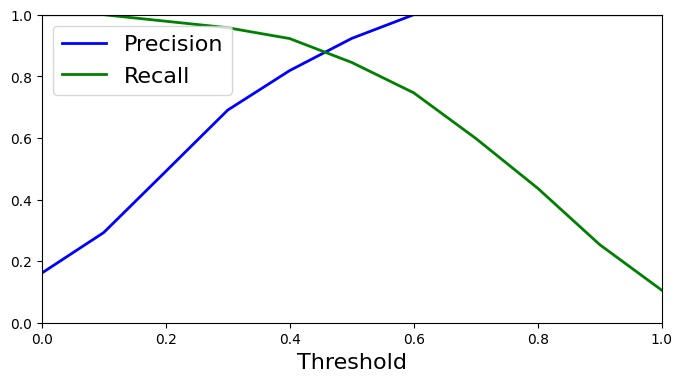

In [56]:
# Show the precision/recall curve
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision_forest, recall_forest, thresholds_forest)
plt.xlim([0.0, 1.0])
plt.show()

## Régression Logistique

In [57]:
from sklearn.linear_model import LogisticRegression

# Instantiate classifier
log_clf = LogisticRegression(random_state=42)

# Fit classifier
log_clf.fit(X_useful_train, y_train_useful_encoded)

LogisticRegression(random_state=42)

In [58]:
# Cross-validate
y_probas_log = cross_val_predict(log_clf, X_useful_train, y_train_useful_encoded, cv=3, 
                                 method="predict_proba")

y_scores_log = y_probas_log[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_train_useful_encoded, y_scores_log)

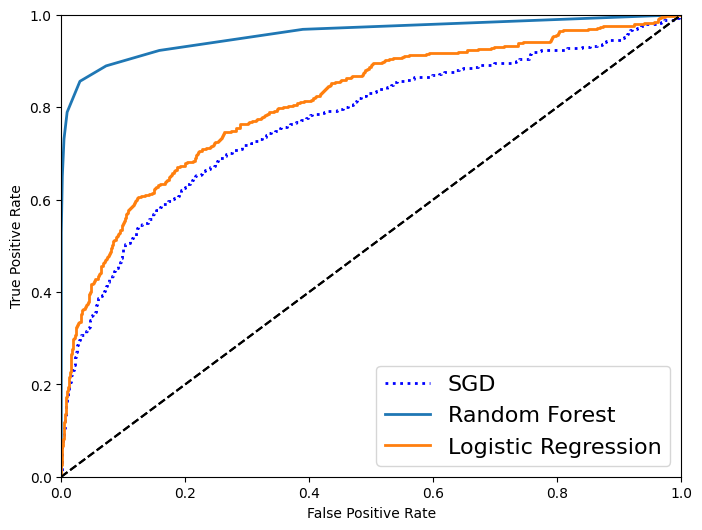

In [59]:
# Show the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [60]:
# Calculate AUC
roc_auc_score(y_train_useful_encoded, y_scores_log)

0.809450302345292

In [61]:
# Calculate precision
precision_score(y_train_useful_encoded, y_train_pred)

0.5277777777777778

In [62]:
# Calculate recall
recall_score(y_train_useful_encoded, y_train_pred)

0.4007029876977153

In [63]:
# Calculate F1 score
f1_score(y_train_useful_encoded, y_train_pred)

0.45554445554445555

In [64]:
# Show the precision/recall curve
y_scores_log = cross_val_predict(log_clf, X_useful_train, y_train_useful_encoded, cv=3, 
                             method="decision_function")

precision_log, recall_log, thresholds_log = precision_recall_curve(y_train_useful_encoded, y_scores_log)

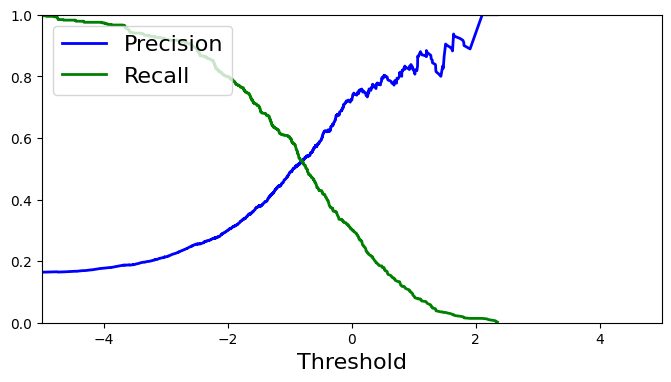

In [65]:
# Show the precision/recall curve
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision_log, recall_log, thresholds_log)
plt.xlim([-5, 5])
plt.show()

## Perceptron

In [66]:
from sklearn.linear_model import Perceptron

# Instantiate classifier
per_clf = Perceptron(random_state=42, max_iter=1000)

# Fit classifier
per_clf.fit(X_useful_train, y_train_useful_encoded)

Perceptron(random_state=42)

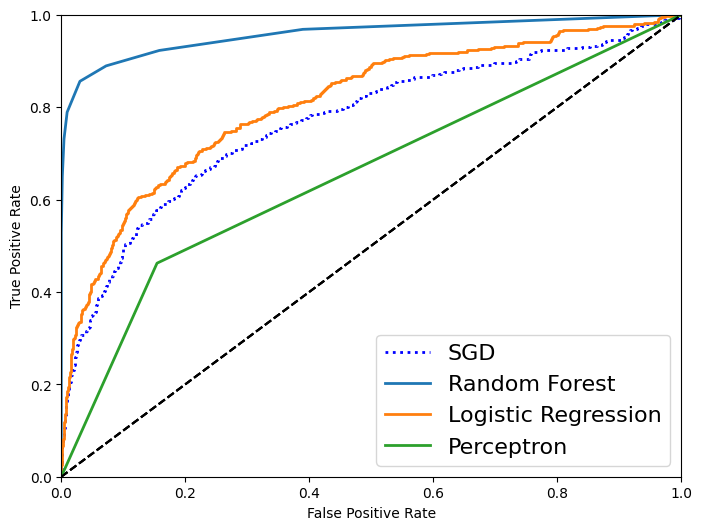

In [73]:
# Show the ROC curve
fpr_per, tpr_per, thresholds_per = roc_curve(y_train_useful_encoded, per_clf.predict(X_useful_train))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plot_roc_curve(fpr_per, tpr_per, "Perceptron")
plt.legend(loc="lower right", fontsize=16)
plt.show()